# Elastic 2D truss with linear bar elements
[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/meyer-nils/torch-fem/blob/main/examples/basic/truss/elasticity_2D.ipynb)

A simple elastic truss with ten nodes and 20 rods. 

In [1]:
import torch

from torchfem import Truss
from torchfem.materials import IsotropicElasticity1D

torch.set_default_dtype(torch.float64)

## Model setup

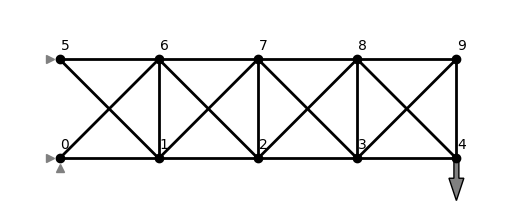

In [2]:
# Create material
material = IsotropicElasticity1D(1000.0)

n1 = torch.linspace(0.0, 4.0, 5)
n2 = torch.linspace(0.0, 1.0, 2)
n1, n2 = torch.stack(torch.meshgrid(n1, n2, indexing="xy"))
nodes = torch.stack([n1.ravel(), n2.ravel()], dim=1)

elements = torch.tensor(
    [
        [0, 1],
        [1, 2],
        [2, 3],
        [3, 4],
        [5, 6],
        [6, 7],
        [7, 8],
        [8, 9],
        [1, 5],
        [0, 6],
        [2, 6],
        [1, 7],
        [3, 7],
        [2, 8],
        [4, 8],
        [3, 9],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9],
    ]
)

# Create truss
truss = Truss(nodes, elements, material)

# Set boundary conditions
truss.forces[4, 1] = -10.0
truss.constraints[0, 0] = True
truss.constraints[0, 1] = True
truss.constraints[5, 0] = True

# Visualize truss
truss.plot()

# Solve

In [3]:
u, f, σ, F, α = truss.solve()

## Visualize stress on deformed configuration

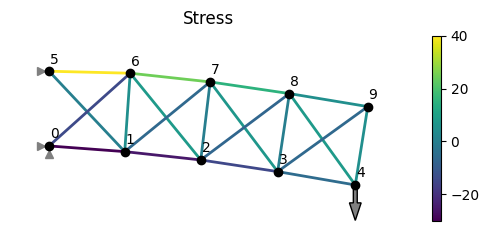

In [4]:
truss.plot(u=u, element_property=σ, title="Stress")